# Language Models and Parameter-Efficient Fine-Tuning

## Language Models


Language models are fundamental to natural language processing. They come in three major categories:

1. **Encoder-only models**: (e.g., BERT, RoBERTa, ELECTRA) - Best suited for understanding tasks such as classification and regression.
2. **Encoder-decoder models**: (e.g., T5, BART) - Ideal for tasks like translation and summarization.
3. **Decoder-only models**: (e.g., GPT-n models) - Primarily used for text generation.


## Autoregressive Language Models


Autoregressive models predict the next token in a sequence based on previous tokens. This enables **conditional generation**, where outputs depend on the given prompt.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Initialize GPT-2 model and tokenizer
def initialize_gpt2():
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    model = GPT2LMHeadModel.from_pretrained("gpt2")
    return tokenizer, model

gpt_tokenizer, gpt_model = initialize_gpt2()

# Function to generate text using GPT-2
def generate_text(prompt, max_length=50, temperature=1.0, top_k=50):
    """
    Generate text using GPT-2 with customizable parameters.

    Args:
        prompt (str): The initial text to seed the model.
        max_length (int): The maximum length of the generated text.
        temperature (float): Sampling temperature. Higher values make output more random.
        top_k (int): Limits sampling to the top-k most likely tokens.

    Returns:
        str: The generated text.
    """
    input_ids = gpt_tokenizer.encode(prompt, return_tensors="pt")

    # Generate text
    outputs = gpt_model.generate(
        input_ids,
        max_length=max_length,
        temperature=temperature,
        top_k=top_k,
        num_beams=5,
        no_repeat_ngram_size=2,
        early_stopping=True
    )
    return gpt_tokenizer.decode(outputs[0], skip_special_tokens=True)

prompts = [
    "Once upon a time, there was a brave knight",
    "Artificial intelligence is changing the world by"
]

for prompt in prompts:
    print(f"Input Prompt: {prompt}")
    print(f"Generated Text: {generate_text(prompt, max_length=100, temperature=0.7)}\n")


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Input Prompt: Once upon a time, there was a brave knight


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text: Once upon a time, there was a brave knight in the field of battle.

He was the son of a noble nobleman, and he had been knighted by his father. He had fought for his country, but he was not a knight. His father had given him a sword and a shield, which he used to defend himself against the enemy. The sword was made of iron, so that he could not use it against his enemies. However, the shield was too heavy for him

Input Prompt: Artificial intelligence is changing the world by
Generated Text: Artificial intelligence is changing the world by making it possible for people to do more with less.

In a recent study, researchers at the University of California, San Diego, found that artificial intelligence can be used to help people better manage their finances. The study was published in the journal Proceedings of the National Academy of Sciences (PNAS) and was funded by the U.S. National Science Foundation.



## Large Language Models (LLMs)


Large Language Models (LLMs) scale up the size and capacity of traditional language models. Key concepts include:

- **Scale**: Models like GPT-3 have billions of parameters, leading to significant improvements in performance.
- **Pre-training and Adaptation**: Pre-trained on massive datasets and later adapted to specific tasks.


[link text](https://)## Ways to Adapt to New Tasks


Methods to adapt pre-trained models include:

1. **Zero-shot learning**: Use task descriptions as prompts without any training examples.
2. **Few-shot learning**: Provide a small number of task-specific examples.
3. **Lightweight Fine-tuning**: Modify only a subset of the model's parameters.
4. **Fine-tuning for human-aligned models**: Align models with human preferences using fine-tuning.


## Zero-shot Learning


 Fine-tuning T5 on a multi-task dataset for zero-shot learning.


In [ ]:
!pip install datasets transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!pip install datasets transformers

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

def zero_shot_question_answering(context, question, model_name="bigscience/T0_3B"):
    # Load the tokenizer and model from Hugging Face Hub
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

    # Prepare the input with the context and question
    prompt = f"context: {context} question: {question}"

    # Tokenize the prompt, with padding and truncation
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, padding=True)

    # Generate an answer from the model
    with torch.no_grad():
        outputs = model.generate(inputs["input_ids"], max_length=50, num_beams=5)

    # Decode the generated output to get the answer
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return answer

# Define the context and the question
context = "The Mona Lisa is a 16th century oil painting created by Leonardo da Vinci."
question = "Who painted the Mona Lisa?"

# Perform zero-shot question answering
answer = zero_shot_question_answering(context, question)
print("Answer:", answer)


tokenizer_config.json:   0%|          | 0.00/1.86k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/632 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/11.4G [00:00<?, ?B/s]

Answer: Leonardo da Vinci


## Few-shot Learning


Few-shot learning strategies include:

1. **Prompt-based fine-tuning**: Modify the prompt to improve performance.
2. **In-context learning (ICL)**: Provide a few examples as part of the prompt for task demonstrations.


#### Prompt-based fine-tuning

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from torch.optim import AdamW
from torch.utils.data import DataLoader, Dataset
from datasets import load_dataset

# Define a custom dataset for prompt-based fine-tuning
class PromptDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=512):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        prompt, response = self.data[idx]
        encoded_input = self.tokenizer(
            prompt,
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors="pt",
        )
        encoded_response = self.tokenizer(
            response,
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors="pt",
        )
        return {
            "input_ids": encoded_input["input_ids"].squeeze(0),
            "attention_mask": encoded_input["attention_mask"].squeeze(0),
            "labels": encoded_response["input_ids"].squeeze(0),
        }

# Load pre-trained model and tokenizer of t5-small
tokenizer = AutoTokenizer.from_pretrained("t5-small")
model = AutoModelForSeq2SeqLM.from_pretrained("t5-small")

# Load SST-2 dataset (GLUE)
raw_dataset = load_dataset("glue", "sst2")

# Prepare data for fine-tuning
processed_data = []
for example in raw_dataset["train"]:
    # The 'sentence' in the SST-2 dataset
    sentence = example["sentence"]
    # The label is 0 for negative, 1 for positive
    label_int = example["label"]
    label_str = "positive" if label_int == 1 else "negative"

    prompt = f"Sentiment analysis: {sentence} The sentiment is"
    # The expected response for T5 might look like: "negative" or "positive"
    response = label_str

    processed_data.append((prompt, response))

# Create dataset and dataloader
dataset = PromptDataset(processed_data, tokenizer, max_length=64)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Define optimizer and device
optimizer = AdamW(model.parameters(), lr=1e-4)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Fine-tuning loop
num_epochs = 1  # For demonstration, keep epochs small
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for batch in dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    print(f"Epoch {epoch+1}, Loss: {avg_loss}")

# Evaluate the fine-tuned model
def generate_response(prompt):
    model.eval()
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, padding="max_length", max_length=64).to(device)
    with torch.no_grad():
        outputs = model.generate(inputs.input_ids, max_length=64)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Test the fine-tuned model
test_sentence = "This movie was absolutely wonderful"
test_prompt = f"Sentiment analysis: {test_sentence} The sentiment is"
response = generate_response(test_prompt)
print(f"Prompt: {test_prompt}")
print(f"Response: {response}")


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch 1, Loss: 0.054025388865574314
Prompt: Sentiment analysis: This movie was absolutely wonderful The sentiment is
Response: positive


#### In-Context Learning(ICL)

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# Initialize a lighter model for efficient in-context learning
def initialize_model():
    model_name = "facebook/opt-125m"  # A lightweight OPT model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name)
    return tokenizer, model

opt_tokenizer, opt_model = initialize_model()

def in_context_learning(prompt_examples, test_prompt, max_length=50, temperature=0.7):
    """
    Perform in-context learning by providing a few examples as part of the prompt.

    Args:
        prompt_examples (list of tuples): List of (input, output) examples.
        test_prompt (str): The input for which the output needs to be predicted.
        max_length (int): Maximum length of the generated text.
        temperature (float): Sampling temperature for controlling randomness.

    Returns:
        str: Generated output for the test_prompt.
    """
    # Build the in-context prompt
    context = "\n---\n".join([f"Input: {inp}\nOutput: {out}" for inp, out in prompt_examples])
    final_prompt = f"{context}\n---\nInput: {test_prompt}\nOutput:"

    # Tokenize and encode the prompt
    inputs = opt_tokenizer(final_prompt, return_tensors="pt", padding=True, truncation=True)
    input_ids = inputs["input_ids"]
    attention_mask = inputs["attention_mask"]

    # Generate the output
    outputs = opt_model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        max_length=max_length,
        temperature=temperature,
        top_k=50,
        pad_token_id=opt_tokenizer.eos_token_id
    )

    # Decode and return the generated text
    generated_text = opt_tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Extract only the generated answer (remove the prompt)
    generated_output = generated_text[len(final_prompt):].strip()
    return generated_output

# Few-shot examples
prompt_examples = [
    ("The weather is rainy.", "Take an umbrella."),
    ("The weather is sunny.", "Wear sunglasses."),
]

# Test input
test_prompt = "The weather is snowy."

# Generate the answer
output = in_context_learning(prompt_examples, test_prompt, max_length=100, temperature=0.7)
print(f"Input: {test_prompt}")
print(f"Generated Output: {output}")


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Input: The weather is snowy.
Generated Output: Wear sunglasses.
---
Input: The weather is cold.
Output: Wear sunglasses.
---
Input: The weather is wet.
Output: Wear sunglasses.
---
Input: The weather is dry.
Output: Wear sunglasses.
---
Input:


## Prompting Paradigm


Prompt engineering is critical for leveraging models like GPT-3. It involves:

- Task-specific prompts to guide the model.
- Advantages: Rapid prototyping, no parameter updates.
- Disadvantages: Sensitivity to prompt design and structure.


## Fine-tuning vs. In-context Learning


Comparison of techniques:

- **Fine-tuning**: Adjusts model weights, often leading to better performance but requires more resources.
- **In-context learning**: Provides task demonstrations as input without modifying the model.


## Parameter-Efficient Fine-Tuning (PEFT)


PEFT methods include:

1. **Adapters**: Add lightweight layers between transformer layers.
2. **Prompt Tuning & Prefix Tuning**: Optimize prompts or prefixes without modifying the model.
3. **LoRA (Low-Rank Adaptation)**: Fine-tune only low-rank updates to model parameters.


#### Adapters


In [98]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel
from datasets import load_dataset

# Define a custom dataset for classification
class TextClassificationDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoded = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors="pt"
        )
        return {
            'input_ids': encoded['input_ids'].squeeze(0),
            'attention_mask': encoded['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Define the Adapter class
class Adapter(nn.Module):
    def __init__(self, hidden_size, adapter_size):
        super(Adapter, self).__init__()
        self.down_proj = nn.Linear(hidden_size, adapter_size, bias=False)
        self.relu = nn.ReLU()
        self.up_proj = nn.Linear(adapter_size, hidden_size, bias=False)

    def forward(self, x):
        down = self.down_proj(x)
        activated = self.relu(down)
        up = self.up_proj(activated)
        return x + up  # Residual connection

# Define the model class using BERT with Adapters
class BERTWithAdapters(nn.Module):
    def __init__(self, num_classes, adapter_size=64):
        super(BERTWithAdapters, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.adapters = nn.ModuleList([
            Adapter(self.bert.config.hidden_size, adapter_size)
            for _ in range(self.bert.config.num_hidden_layers)
        ])
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        # output_hidden_states=True returns hidden states for each layer
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            output_hidden_states=True
        )
        hidden_states = outputs.hidden_states

        # Apply adapters to each layer's hidden states
        # hidden_states[0] is the embedding layer; hidden_states[i+1] is i-th BERT layer
        # so we iterate over each BERT layer and apply the corresponding adapter
        adapted_hidden_states = []
        for i, adapter in enumerate(self.adapters):
            adapted_hidden_states.append(adapter(hidden_states[i + 1]))

        # Use the last adapter output for classification
        # adapted_hidden_states[-1].shape is [batch_size, seq_len, hidden_size]
        # We'll use the [CLS] token representation, which is the first token
        pooled_output = adapted_hidden_states[-1][:, 0]
        x = self.dropout(pooled_output)
        return self.classifier(x)

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Load GLUE SST-2 dataset
data = load_dataset("glue", "sst2")

# Prepare training data
train_texts = data["train"]["sentence"]
train_labels = data["train"]["label"]

# Prepare validation data
val_texts = data["validation"]["sentence"]
val_labels = data["validation"]["label"]

# Create dataset and dataloaders
train_dataset = TextClassificationDataset(train_texts, train_labels, tokenizer, max_length=64)
val_dataset = TextClassificationDataset(val_texts, val_labels, tokenizer, max_length=64)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERTWithAdapters(num_classes=2).to(device)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
loss_fn = nn.CrossEntropyLoss()

# Training loop
num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch+1}, Loss: {avg_loss}")

# Evaluation loop
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch in val_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs, dim=1)
        correct += (predictions == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print(f"Validation Accuracy: {accuracy:.2f}")


Epoch 1, Loss: 0.19929222981124728
Validation Accuracy: 0.93


## Intrinsic Dimensionality


Research shows that LLMs operate in a low intrinsic dimension, meaning effective fine-tuning can occur in smaller parameter spaces.


## LoRA (Low-Rank Adaptation)


LoRA reduces the number of tunable parameters by:

1. Keeping original weights fixed.
2. Adding low-rank matrices to capture task-specific adaptations.

### Results and Takeaways
- Comparable performance to full fine-tuning with fewer parameters.
- Sometimes even outperforms full fine-tuning.


## Parameter-Efficient Fine-Tuning (PEFT) and Low-Rank Adaptation (LoRA)

# Introduction to PEFT and LoRA
## Parameter-Efficient Fine-Tuning (PEFT) and Low-Rank Adaptation (LoRA)

### Why PEFT?
Traditional fine-tuning of large language models requires updating all model parameters, which can be computationally expensive and memory-intensive. Parameter-Efficient Fine-Tuning (PEFT) techniques address this limitation by modifying only a small subset of parameters, reducing resource requirements significantly.

### What is LoRA?
LoRA (Low-Rank Adaptation) is a specific PEFT method that inserts low-rank matrices into the architecture of a pre-trained model, enabling efficient adaptation for downstream tasks. It is widely used for fine-tuning large language models like GPT and BERT without modifying their core parameters.

In this section, we will implement LoRA for fine-tuning a pre-trained BART model on a text summarization task.


In [78]:
# Install required libraries
!pip install transformers peft datasets rouge-score evaluate --quiet

In [79]:
# !pip install evaluate --quiet


In [80]:
# Import libraries
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainer, Seq2SeqTrainingArguments
from peft import get_peft_model, LoraConfig, TaskType
from datasets import load_dataset
# from datasets import load_metric
import matplotlib.pyplot as plt
import evaluate  # **Added import for evaluate**

In [81]:
# Load dataset
dataset = load_dataset("cnn_dailymail", "3.0.0")# TODO: load the cnn_dailymail dataset with 5000 training samples and train/test split

In [82]:
# Select subsets for training and validation
dataset["train"] = dataset["train"].select(range(5000))
dataset["validation"] = dataset["validation"].select(range(1000))
dataset["test"] = dataset["test"].select(range(1000))  # Ensure test set is also selected


In [83]:
# # Select subsets for training and validation
# dataset["train"] = dataset["train"].select(range(100))
# dataset["validation"] = dataset["validation"].select(range(100))
# dataset["test"] = dataset["test"].select(range(100))  # Ensure test set is also selected


In [84]:
# Load pre-trained model and tokenizer
model_name = "facebook/bart-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

In [85]:
def preprocess_function(examples):
    # "article" is the input, "highlights" is the summary in CNN/DailyMail
    inputs = examples["article"]
    model_inputs = tokenizer(
        inputs,
        max_length=1024,
        truncation=True,
        padding="max_length"
    )
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            examples["highlights"],
            max_length=128,
            truncation=True,
            padding="max_length"
        )
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [86]:
# 4. Tokenize dataset
tokenized_datasets = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [87]:
# LoRA Configuration
lora_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    r=8,
    lora_alpha=32,
    lora_dropout=0.1,
    target_modules=["q_proj","v_proj"]  # typical for BART/encoder-decoder attention
)

In [88]:
# Apply LoRA to the model
peft_model = get_peft_model(model, lora_config)
print("LoRA model created with PEFT.")


LoRA model created with PEFT.


In [89]:
# Define training arguments with wandb disabled
training_args = Seq2SeqTrainingArguments(
    output_dir="./lora-bart-summarization",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    num_train_epochs=1,
    logging_steps=50,
    predict_with_generate=True,
    logging_dir="./logs",
    report_to="none",  # Disable wandb
)

# Trainer setup
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Replace -100 in the labels as we can't decode them
    labels = [
        [(label if label != -100 else tokenizer.pad_token_id) for label in labels_seq]
        for labels_seq in labels
    ]
    # Convert token IDs back to text
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Load the ROUGE metric from evaluate
    rouge = evaluate.load("rouge")

    # Compute ROUGE
    result = rouge.compute(
        predictions=decoded_preds,
        references=decoded_labels,
        use_stemmer=True
    )

    # Since 'result["rouge1"]' is a float, return it directly
    return {
        "rouge1": result["rouge1"],
        "rouge2": result["rouge2"],
        "rougeL": result["rougeL"],
    }


trainer = Seq2SeqTrainer(
    model=peft_model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [90]:
# Train model
trainer.train()

# Save the fine-tuned LoRA model
peft_model.save_pretrained("./lora-bart-summarization")

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel
1,4.372600,4.014680,0.244801,0.095241,0.195115


### ROUGE Metric
ROUGE (Recall-Oriented Understudy for Gisting Evaluation) is a popular metric for evaluating text summarization tasks. It measures the overlap between the generated summaries and reference summaries using metrics such as ROUGE-1, ROUGE-2, and ROUGE-L:

- **ROUGE-1**: Measures overlap of unigrams (single words).
- **ROUGE-2**: Measures overlap of bigrams (two consecutive words).
- **ROUGE-L**: Considers the longest common subsequence (LCS).

In this implementation, we use the `evaluate` library to compute ROUGE scores for the generated summaries compared to the ground truth.


In [91]:
# # Install evaluate library
# !pip install evaluate --quiet

# # evaluation metric
# rouge = # TODO

In [92]:
# # Generate predictions and evaluate
# def evaluate_model(trainer, dataset, tokenizer):
#     predictions, labels, _ = # TODO: use the trainer to generate predictions on the dataset
#     decoded_preds = # TODO: decode the predictions using the tokenizer
#     decoded_labels = # TODO: decode the labels using the tokenizer

#     result = # TODO: compute ROUGE scores using predictions and references
#     return decoded_preds, decoded_labels, {key: value for key, value in result.items()}

# preds, labels, results = # TODO
# print("ROUGE scores:", results)

In [93]:
# Evaluate on test set
metrics = trainer.evaluate(tokenized_datasets["test"])
print("Test Set ROUGE Metrics:", metrics)


Test Set ROUGE Metrics: {'eval_loss': 4.011188983917236, 'eval_rouge1': 0.24462057235786822, 'eval_rouge2': 0.09559487381892824, 'eval_rougeL': 0.197796794040154, 'eval_runtime': 248.7935, 'eval_samples_per_second': 4.019, 'eval_steps_per_second': 2.01, 'epoch': 1.0}


### Predictions vs Ground Truth

Below are some examples of the model's predictions compared to the ground truth summaries:


In [94]:
# for i in range(3):  # Display 3 samples
#     print(f"\n**Input Article {i+1}:**\n", # TODO: display the first 500 characters of the article, "...")
#     print(f"\n**Ground Truth Summary {i+1}:**\n", # TODO: display the ground truth summary)
#     print(f"\n**Model Prediction {i+1}:**\n", # TODO: display the model prediction)

# # Plot ROUGE scores
# # TODO: create a bar plot of the ROUGE scores
# plt.bar(results.keys(), results.values(), color='skyblue')
# plt.title("ROUGE Scores")
# plt.ylabel("F1-Score")
# plt.xlabel("Metric")
# plt.show()

In [95]:
# Generate predictions and sample outputs
sample_input = dataset["test"][0]["article"]
inputs = tokenizer(sample_input, return_tensors="pt", truncation=True, max_length=1024).to(peft_model.device)
summary_ids = peft_model.generate(**inputs, max_length=128, num_beams=4)
print("\n**Original Article**\n", sample_input[:500] + "...\n")  # truncated
print("\n**Reference Summary**\n", dataset["test"][0]["highlights"])
print("\n**LoRA BART Summary**\n", tokenizer.decode(summary_ids[0], skip_special_tokens=True))


**Original Article**
 (CNN)The Palestinian Authority officially became the 123rd member of the International Criminal Court on Wednesday, a step that gives the court jurisdiction over alleged crimes in Palestinian territories. The formal accession was marked with a ceremony at The Hague, in the Netherlands, where the court is based. The Palestinians signed the ICC's founding Rome Statute in January, when they also accepted its jurisdiction over alleged crimes committed "in the occupied Palestinian territory, includin...


**Reference Summary**
 Membership gives the ICC jurisdiction over alleged crimes committed in Palestinian territories since last June .
Israel and the United States opposed the move, which could open the door to war crimes investigations against Israelis .

**LoRA BART Summary**
 Palestinian Authority officially becomes 123rd member of the International Criminal Court on Wednesday .
Palestinian Authority formally becomes a State Party to the Rome Statute .
The ICC op

In [96]:
# Displaying predictions for the first 3 test samples
for i in range(3):  # Display 3 samples
    print(f"\n**Input Article {i+1}:**\n", dataset["test"][i]["article"][:500] + "...\n")  # Display first 500 characters
    print(f"\n**Ground Truth Summary {i+1}:**\n", dataset["test"][i]["highlights"])

    # Generate model prediction
    inputs = tokenizer(dataset["test"][i]["article"], return_tensors="pt", truncation=True, max_length=1024).to(peft_model.device)
    summary_ids = peft_model.generate(**inputs, max_length=128, num_beams=4)
    print(f"\n**LoRA BART Summary {i+1}:**\n", tokenizer.decode(summary_ids[0], skip_special_tokens=True))



**Input Article 1:**
 (CNN)The Palestinian Authority officially became the 123rd member of the International Criminal Court on Wednesday, a step that gives the court jurisdiction over alleged crimes in Palestinian territories. The formal accession was marked with a ceremony at The Hague, in the Netherlands, where the court is based. The Palestinians signed the ICC's founding Rome Statute in January, when they also accepted its jurisdiction over alleged crimes committed "in the occupied Palestinian territory, includin...


**Ground Truth Summary 1:**
 Membership gives the ICC jurisdiction over alleged crimes committed in Palestinian territories since last June .
Israel and the United States opposed the move, which could open the door to war crimes investigations against Israelis .

**LoRA BART Summary 1:**
 Palestinian Authority officially becomes 123rd member of the International Criminal Court on Wednesday .
Palestinian Authority formally becomes a State Party to the Rome Statute .
T

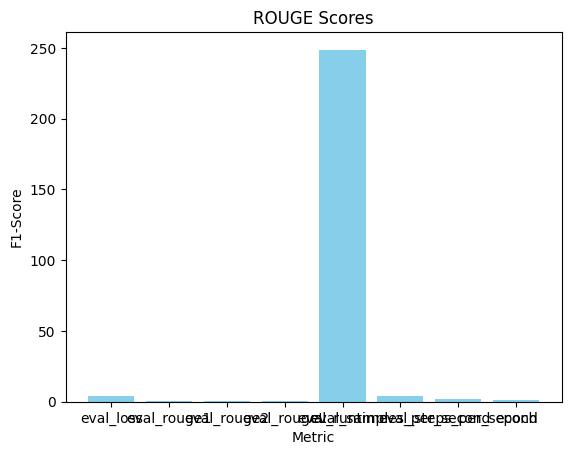

In [97]:
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.title("ROUGE Scores")
plt.ylabel("F1-Score")
plt.xlabel("Metric")
plt.show()

After fine-tuning with LoRA, we can compare the performance against traditional fine-tuning:

1. **Training Time**: LoRA reduces training time by only modifying specific parameters.
2. **Memory Usage**: The low-rank matrices minimize memory consumption.
3. **Performance Metrics**: Evaluate the ROUGE scores on the CNN/DailyMail test dataset.

The bar chart above visualizes the ROUGE metrics, and the displayed predictions provide qualitative insights into the model's performance.
